## Final Project Submission

Please fill out:
* Student name: BRITTA BETTENDORF
* Student pace: FULL TIME
* Scheduled project review date/time: FEBRUARY 8 2019, 2pm CEST
* Instructor name: RAFAEL CARRASCO
* Blog post URL: https://datenlage.blog/2019/02/08/toxic-comments/

## Identify and Classify Toxic Online Comments

### The dataset

For my fourth project, I chose the __[Toxic Comment Classification dataset on Kaggle](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge#description)__, where I was challenged to build a model that’s capable of detecting different types of toxicity in online comments such as threats, obscenity, insults, and identity-based hate.

Google's Conversation AI team is working on tools to help improve online conversations as the threat of abuse and harassment online lead many people to stop expressing themselves and give up on seeking different opinions. To better their current models in detecting toxic comments, they set up a competition on Kaggle hoping to help online discussions become more productive and respectful.

### The Deep Learning Approach

One of the widely used Natural Language Processing (NLP) tasks in different business problems is text classification, whose goal is to automatically classify a text document into one or more predefined categories. It’s an example of a supervised machine learning algorithm, since a labelled dataset is used for training a classifier.

Here, the requirement is to build a multi-headed model that is capable of detecting different types of toxicity like threats, obscenity, insults and identity-based hate to improve Jigsaw/Google's current models. 

In **multi-headed classification**, data can belong to more than one label simultaneously. For example, in our case a comment may be toxic, obscene, and insulting at the same time. It may also happen that the comment is non-toxic and hence does not belong to any of the six labels.

Deep learning is a subset of machine learning that uses a model of computing that's very much inspired by the structure of the brain. Hence, we call this model a neural network. In recent times, deep learning has transformed the fields of Natural Language Processing (NLP), where **deep neural networks** have achieved state-of-the-art performance.

![](images/1*M3UyIGshEm1U1H70GwFGMw.png)

## Table of contents
<a id='Table of contents'></a>

### <a href='#1. Obtaining and Viewing the Data'> 1. Obtaining and Viewing the Data </a>

### <a href='#2. Data Visualization'> 2. Data Visualization </a>

* <a href='#2.1. Bar Chart'> 2.1. Bar Chart </a>
* <a href='#2.2. Correlation Matrix'> 2.2. Correlation Matrix </a>
* <a href='#2.3. Venn Diagrams'> 2.3. Venn Diagrams </a>
* <a href='#2.4. Word Clouds'> 2.4. Word Clouds </a>

### <a href='#3. Preprocessing the Data'> 3. Preprocessing the Data </a>

### <a href='#4. Evaluating Different Neural Networks'> 4. Evaluating Different Neural Networks </a>

* <a href='#4.1. Baseline Neural Network'> 4.1. Baseline Neural Network </a>
* <a href='#4.2. Convolutional Neural Network (CNN)'> 4.2. Convolutional Neural Network (CNN) </a>
* <a href='#4.3. Recurrent Neural Network (RNN)'> 4.3. Recurrent Neural Network (RNN) </a>
* <a href='#4.4. CNN with Pre-Trained GloVe Embedding'> 4.4. CNN with Pre-Trained GloVe Embedding </a>
* <a href='#4.5. RNN with Pre-Trained GloVe Embedding'> 4.5. RNN with Pre-Trained GloVe Embedding </a>

### <a href='#5. Conclusions'>5. Conclusions </a>

## 1. Obtaining and Viewing the Data
<a id='1. Obtaining and Viewing the Data' >

The data consist of many Wikipedia comments which have been labelled by humans according to their relative toxicity. It includes the following:

- train.csv - the training set, contains comments with their binary labels
- test.csv - the test set, predicts toxicity probabilities for these comments.
- sample_submission.csv - the submission sample with the correct format
- test_labels.csv - labels for the test data (value of -1 indicates it was not used for scoring)

We'll start by loading in our training and testing data.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns

**1. Test Data**

In [4]:
test_labels = pd.read_csv('data/test_labels.csv')
print(test_labels.shape)
test_labels.head(2)

(153164, 7)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1


The description states *"value of -1 indicates it was not used for scoring"*, so we will drop all of those rows.

In [5]:
test_labels = test_labels[(test_labels[['toxic','severe_toxic', 'obscene', 'threat', 
                                        'insult', 'identity_hate']] != -1).all(axis=1)]
print(test_labels.shape)
test_labels.head(2)

(63978, 7)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0


In [6]:
df_test = pd.read_csv('data/test.csv')
print(df_test.shape)
df_test.head(2)

(153164, 2)


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...


The *test comments* and the *test labels* - both in different datasets - differ in their length, as we had to drop a substantial amount of rows in the first one. Let's merge both datasets with an inner join to keep only the records with a proper label.

In [7]:
# merge with an inner join
test = pd.merge(test_labels, df_test, on='id', how='inner')
print(test.shape)
test.head(2)

(63978, 8)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,0001ea8717f6de06,0,0,0,0,0,0,Thank you for understanding. I think very high...
1,000247e83dcc1211,0,0,0,0,0,0,:Dear god this site is horrible.


**2. Training Data:**

In [8]:
train = pd.read_csv('data/train.csv')
train.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


So we have a column `id`, the comment itself in `comment_text` and six different labels qualifying the comment as `toxic`, `severe_toxic`, `obscene`, a `threat`, an `insult`, or `identity_hate`. Note that a comment can be qualified with several labels - or even with none of them!

In [9]:
# check the number of records
print('The dataset contains', train.shape[0], 'records and', train.shape[1], 'columns.')

The dataset contains 159571 records and 8 columns.


In [10]:
# check that there are no missing values in either training set
print('The dataset has', train.isna().sum().sum(), 'missing values.')

The dataset has 0 missing values.


In [11]:
# check if there are any duplicates
print('The dataset has', train.duplicated().sum(), 'duplicates.')

The dataset has 0 duplicates.


Let's explore some comments:

In [12]:
train['comment_text'][4]

"You, sir, are my hero. Any chance you remember what page that's on?"

In [13]:
train['comment_text'][13]

"Before you start throwing accusations and warnings at me, lets review the edit itself-making ad hominem attacks isn't going to strengthen your argument, it will merely make it look like you are abusing your power as an admin. \nNow, the edit itself is relevant-this is probably the single most talked about event int he news as of late. His absence is notable, since he is the only living ex-president who did not attend. That's certainly more notable than his dedicating an aircracft carrier. \nI intend to revert this edit, in hopes of attracting the attention of an admin that is willing to look at the issue itself, and not throw accusations around quite so liberally. Perhaps, if you achieve a level of civility where you can do this, we can have a rational discussion on the topic and resolve the matter peacefully."

In [14]:
train['comment_text'][1392]

'"\nCondolences to you, your wife and family...my prayers are with you..  ☥  "'

*Back to: <a href='#Table of contents'> Table of contents </a>*
## 2. Data Visualization
<a id='2. Data Visualization' >

To make myself familiar with the data, it's always practical to perform some data visualizations. The first question that comes to my mind is: <br> **What type of comments occur most frequently?** Let's have a look!

### 2.1. Bar Chart
<a id='2.1. Bar Chart' >

In [15]:
# creating a list of column names
columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

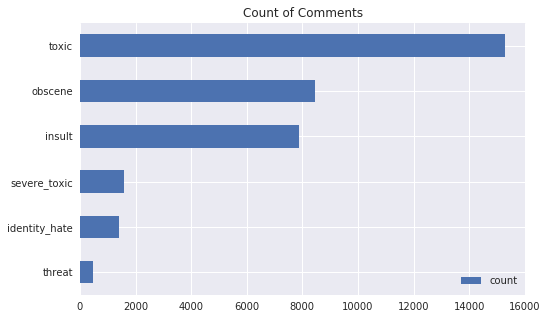

In [16]:
# to_frame() converts series to DataFrame
frequency = train[columns].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')
frequency.plot.barh(y='count', title='Count of Comments', figsize=(8, 5));

The three types of comments that occur most often are:
- toxic comments
- obscene comments
- insulting comments.

Let's dive deeper and have a look at the number of frequent comment combinations:

In [17]:
train.groupby(columns).size().sort_values(ascending=False).reset_index()\
                      .rename(columns={0: 'count'}).head(15)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,count
0,0,0,0,0,0,0,143346
1,1,0,0,0,0,0,5666
2,1,0,1,0,1,0,3800
3,1,0,1,0,0,0,1758
4,1,0,0,0,1,0,1215
5,1,1,1,0,1,0,989
6,1,0,1,0,1,1,618
7,0,0,1,0,0,0,317
8,0,0,0,0,1,0,301
9,1,1,1,0,1,1,265


- Non-toxic comments, i.e. comments which have no label, are clearly ahead with 143346 comments. 
- "Toxic" comments then occur in different combinations within the first 15 ranks. The same holds for "obscene" comments as well as for "insult" comments. 
- Interestingly, the number of comments for each combination drops exponentially. 

This leads to looking at a correlation matrix.

### 2.2. Correlation Matrix
<a id='2.2. Correlation Matrix' >

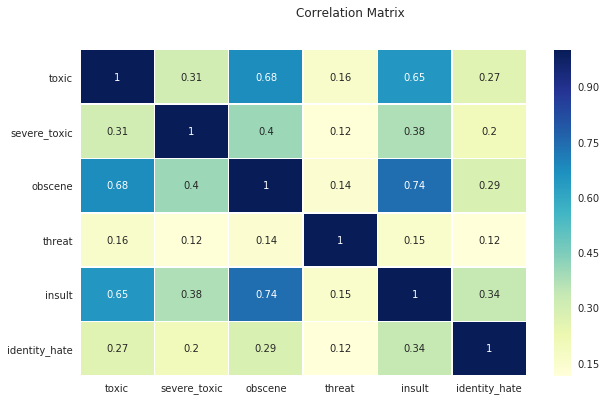

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(train[columns].corr(), annot=True, cmap="YlGnBu", linewidths=.5, ax=ax);

The correlation matrix illuminates interesting relationships :
- "Toxic" comments are clearly correlated with both "obscene" and "insult" comments.
- Interestingly, "toxic" and "severe_toxic" are only weakly correlated.
- "Obscene" comments and "insult" comments are also highly correlated, which makes perfect sense.

Next, let's use Venn diagrams to visualize these overlaps.

### 2.3. Venn Diagrams
<a id='2.3. Venn Diagrams' >

In [27]:
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from matplotlib_venn import venn3_circles
from matplotlib_venn import venn2_circles

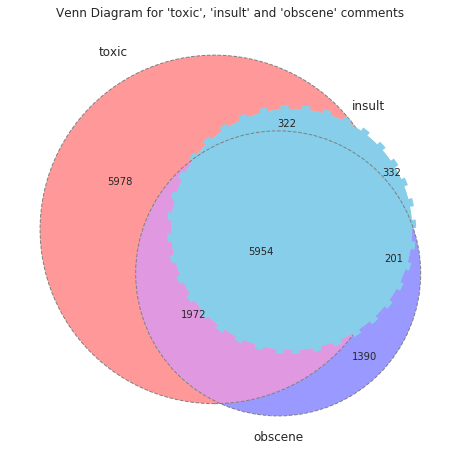

In [30]:
# build combinations
only_t = train[(train['toxic']==1) & (train['insult']==0) & (train['obscene']==0)].shape[0]
only_i = train[(train['toxic']==0) & (train['insult']==1) & (train['obscene']==0)].shape[0]
only_o = train[(train['toxic']==0) & (train['insult']==0) & (train['obscene']==1)].shape[0]

both_t_i = train[(train['toxic']==1) & (train['insult']==1) & (train['obscene']==0)].shape[0]
both_t_o = train[(train['toxic']==1) & (train['insult']==0) & (train['obscene']==1)].shape[0]
both_i_o = train[(train['toxic']==0) & (train['insult']==1) & (train['obscene']==1)].shape[0]

all_t_i_o = train[(train['toxic']==1) & (train['insult']==1) & (train['obscene']==1)].shape[0]


# plot venn diagrams
plt.figure(figsize=(8, 8))
plt.title("Venn Diagram for 'toxic', 'insult' and 'obscene' comments")

v=venn3(subsets=(only_t, only_i, only_o, both_t_i, both_t_o, both_i_o, all_t_i_o), 
      set_labels=('toxic', 'insult', 'obscene'))

c=venn3_circles(subsets=(only_t, only_i, only_o, both_t_i, both_t_o, both_i_o, all_t_i_o),
                linestyle='dashed', linewidth=1, color="grey")
c[1].set_lw(8.0)
c[1].set_ls('dotted')
c[1].set_color('skyblue')

plt.show();

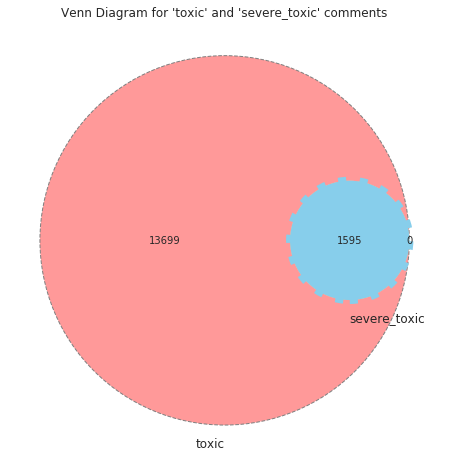

In [31]:
# build combinations
only_t   = train[(train['toxic']==1) & (train['severe_toxic']==0)].shape[0]
only_s   = train[(train['toxic']==0) & (train['severe_toxic']==1)].shape[0]
both_t_s = train[(train['toxic']==1) & (train['severe_toxic']==1)].shape[0]

# plot venn diagrams
plt.figure(figsize=(8, 8))
plt.title("Venn Diagram for 'toxic' and 'severe_toxic' comments")
v=venn2(subsets=(only_t, only_s, both_t_s), set_labels=('toxic', 'severe_toxic'))

c=venn2_circles(subsets=(only_t, only_s, both_t_s),
                linestyle='dashed', linewidth=1, color="grey")
c[1].set_lw(8.0)
c[1].set_ls('dotted')
c[1].set_color('skyblue')

plt.show();

### 2.4. Word Clouds
<a id='2.4. Word Clouds' >

What does it mean to talk in an "insulting" or "obscene" or "threatening" way? <br> Word Clouds are a great visualization tool that helps to shed light upon these - so far hidden - comments.

In [18]:
# import necessary libraries
from wordcloud import WordCloud
from collections import Counter

import re
import string

from nltk.corpus import stopwords
stop = stopwords.words('english')

In [19]:
# define an empty dictionary
word_counter = {}

# writing a clean_text function
def clean_text(text):
    text = re.sub('[{}]'.format(string.punctuation), ' ', text.lower())
    return ' '.join([word for word in text.split() if word not in (stop)])

In [20]:
# iterating through all columns in the dataset...
for col in columns:    
    text = Counter()        
    
    # ... applying the clean-function to each column's comments and ...
    train[train[col] == 1]['comment_text'].apply(lambda t: text.update(clean_text(t).split()))
    
    # ... combining all to one dataframe
    word_counter[col] = pd.DataFrame.from_dict(text, orient='index')\
                                        .rename(columns={0: 'count'})\
                                        .sort_values('count', ascending=False)

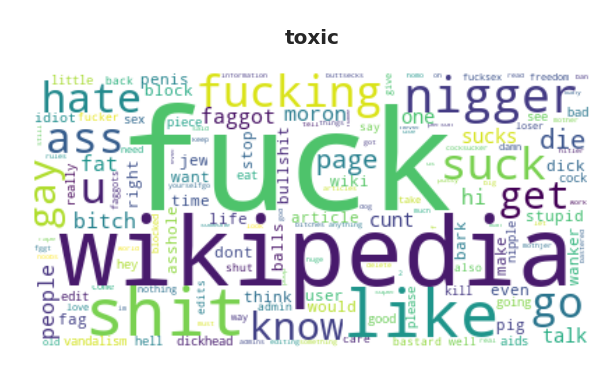

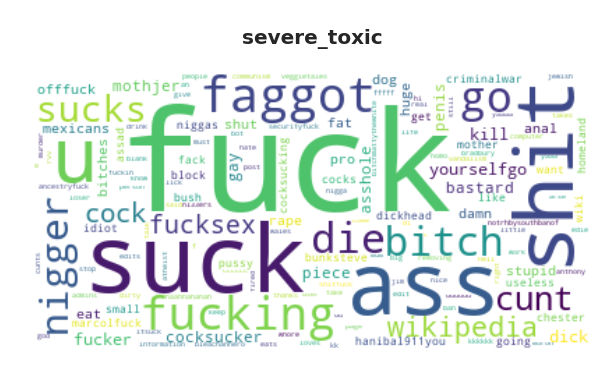

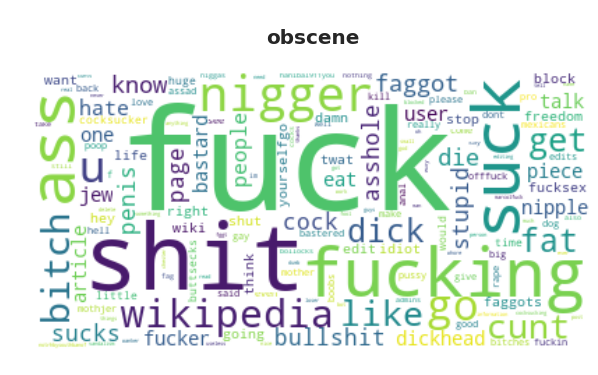

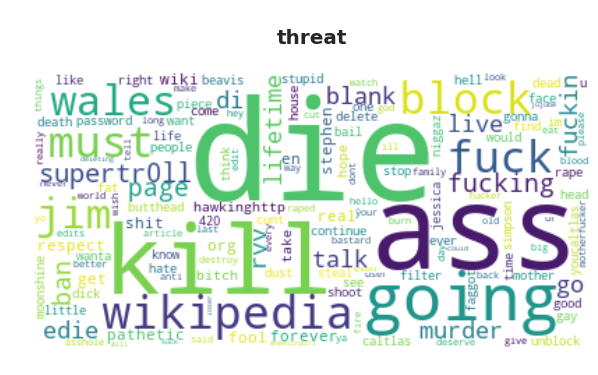

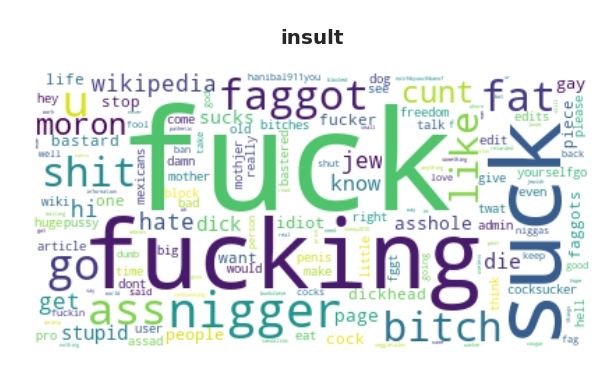

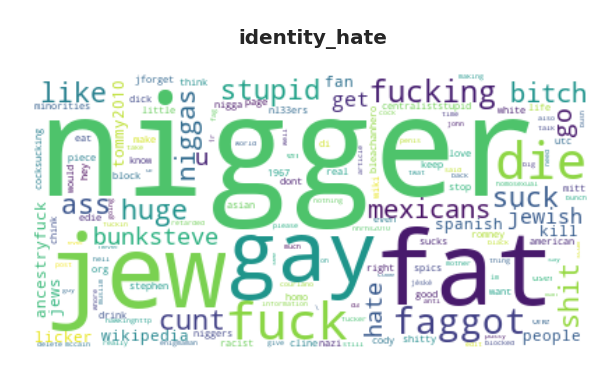

In [21]:
# iterating through new df word_counter and creating a WordCloud for each column
for col in word_counter:    
    wc_list = word_counter[col]
    
    wordcloud = WordCloud(background_color='white', max_words=150, max_font_size=100, random_state=4)\
                          .generate_from_frequencies(wc_list.to_dict()['count'])

    fig = plt.figure(figsize=(10, 8))
    plt.title('\n' + col + '\n', fontsize=20, fontweight='bold')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

*Back to: <a href='#Table of contents'> Table of contents </a>*
## 3. Preprocessing the Data
<a id='3. Preprocessing the Data' >

Now, we have to preprocess our text data. **But how do we represent words to a deep learning algorithm?**

1. We could, for instance, use a “bag of words” representation: think of a **one-hot vector** where there is one dimension for every word. If there are 13 million English words, this vector would be a 13 million-dimensional vector, with a "hot code" 1 for a given word. Yes, this is not a great representation of words.

2. Instead, there are many **Word Embedding** models which map words to vectors (where the size of the vector is much smaller, like 300). These vectors use similarity metrics to reveal meaningful "semantic relationships" between certain words. Furthermore, the size of word embeddings is a tunable parameter, which can help overcome the "Curse of Dimensionality".

Word Embeddings in a nutshell:

- Word embeddings provide a dense representation of words and their relative meanings.

- They are an improvement over the sparse representations used in simpler "bag of word" model representations.

- Word embeddings can be learned from text data and reused among projects. They can also be learned as part of fitting a neural network onto text data.

- There are two different ways to feed Word Embeddings into a neural network: train your own embedding layer or use a pre-trained embedding (like GloVe).
    
To convert our text to vectors, we use Keras's convenient preprocessing tools to **tokenize** each example, convert it to a **sequence**, and then **pad the sequences** so they're all the same length.

In [14]:
# importing libraries
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence

Using TensorFlow backend.


In [16]:
X_train = train["comment_text"].values
X_test  = test["comment_text"].values

y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
y_test  = test[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [17]:
# tokenizing the data
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X_train))

# turning the tokenized text into sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test  = tokenizer.texts_to_sequences(X_test)

# padding the sequences
X_train = sequence.pad_sequences(X_train, maxlen=200)
X_test  = sequence.pad_sequences(X_test,  maxlen=200)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (159571, 200)
X_test shape:  (63978, 200)


*Back to: <a href='#Table of contents'> Table of contents </a>*
## 4. Evaluating Different Neural Networks
<a id='4. Evaluating Different Neural Networks' >

Deep learning models - or neural networks - have achieved state-of-the-art results in text classification problems. Here we work through different neural networks to compare their results.

We'll start with **three deep learning models that use their own trained embedding layer**, and then try **two algorithms that use pre-trained embeddings**.

First we import the necessary **Keras libraries** ...

In [29]:
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam

... and then set some **model parameters**.

In [19]:
# number of unique words we want to use (or: number of rows in incoming embedding vector)
max_features = 20000 

# max number of words in a comment to use (or: number of columns in incoming embedding vector)
max_len = 200 

# dimension of the embedding variable (or: number of rows in output of embedding vector)
embedding_dims = 128

### 4.1.  Baseline Neural Network
<a id='4.1. Baseline Neural Network' >

Let's start with instantiating a classic densely connected neural network to create a strong baseline. It's composed of several layers:

- The **input layer**  is the first layer in the neural network. It takes input values and passes them on to the next layer without applying any operations to them. We begin by defining an input layer that accepts a list of words with a dimension of 200 (= max words in one comment).

- Next, we pass our vectors to an **embedding layer**, where we project the words onto a defined vector space depending on the distance of the surrounding words in a sentence. Embedding allows us to reduce model size, and most importantly the huge dimensions we have to deal with. 

- The output of the embedding layer is just a list of the coordinates of the words in this vector space. We need to define the size of this vector space and the number of unique words we are using. It's important to know that the embedding size is a parameter that one can tune and experiment with.

- A **pooling layer** effectively downsamples the output of the prior layer, reducing the number of operations required for all following layers, but still passing on the valid information from the previous layer.

- **Dense layers (or fully connected layers)** are simply a linear operation in which every input is connected to every output by a weight, generally followed by a non-linear activation function.

- **Regularization  layers** are used to overcome the over-fitting problem. In regularization we either penalise our loss term by adding a L1 (LASSO) or an L2 (Ridge) norm on the weight vector. Alternatively, we can apply a dropout layer where individual nodes are dropped out of the net, so that a reduced network is left.

- Finally, the **output layer**  is the last layer in the network and receives its input from the last hidden layer. With this layer we can get the desired number of values in a desired range. In our network we have 6 neurons in the output layer.

- **Activation functions** are used to introduce non-linearity to neural networks. They squash the values into a smaller range. There are many activation functions used in the deep learning industry such as ReLU, Sigmoid or TanH.

![](images/1*X_CJvgYFbcqimKhMfK-ydw.jpeg)

Inspiration for the setup of this NN can be found __[here.](https://www.depends-on-the-definition.com/classify-toxic-comments-on-wikipedia/)__

In [24]:
# instantiate NN model
base_model = Sequential()

# add embedding layer 
base_model.add(Embedding(input_dim=max_features, input_length=max_len,
                         output_dim=embedding_dims))

# add pooling layer 
# ... which will extract features from the embeddings of all words in the comment
base_model.add(GlobalMaxPool1D())

# add dense layer to produce an output dimension of 50 and apply relu activation
base_model.add(Dense(50, activation='relu'))

# set the regularizing dropout layer to drop out 30% of the nodes
base_model.add(Dropout(0.3))

# finally add a dense layer
# ... which projects output into six units and squash it with sigmoid activation
base_model.add(Dense(6, activation='sigmoid'))

Next, we compile the network:

- The **loss function** computes the error for a single training example. The cost function is the average of the loss functions of the entire training set. Our choice here is `categorical_crossentropy`, i.e. a multi-class logarithmic loss.
- When we train neural networks, we usually use Gradient Descent to optimize the weights. At each iteration, we use back-propagation to calculate the derivative of the loss function with respect to each weight and subtract it from that weight. The **learning rate** determines how quickly or how slowly we want to update our weight values. It should be just high enough to take an acceptable time to converge, and just low enough to be capable of finding the local minima.
- The **optimizer** is a search technique, which is used to update weights in the model. Our choice here is Adaptive Moment Estimation (`Adam`) which uses adaptive learning rates.
- Performance **metrics** are used to measure the performance of the neural network. Accuracy, loss, validation accuracy, validation loss, mean absolute error, precision, recall and f1 score are some performance metrics. Our choice here is `accuracy`.

In [25]:
base_model.compile(loss='binary_crossentropy',
                   optimizer=Adam(0.01), metrics=['accuracy'])

# check the model with all our layers
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                6450      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 306       
Total params: 2,566,756
Trainable params: 2,566,756
Non-trainable params: 0
_________________________________________________________________


Finally, we train the network with some parameters:

- The **batch size** is the number of training examples in one forward/backward pass. In general, larger batch sizes result in faster progress in training, but don't always converge as quickly. Smaller batch sizes train slower, but can converge faster. And the higher the batch size, the more memory space you’ll need.

- The training **epochs**  are the number of times that the model is exposed to the training dataset. One epoch equals one forward pass and one backward pass of all the training examples. In general, the models improve with more epochs of training, to a point. They'll start to plateau in accuracy as they converge.

In [26]:
base_hist = base_model.fit(X_train, y_train, batch_size=32, 
                           epochs=3, validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/3
143613/143613 [==============================] - 854s 6ms/step - loss: 0.0660 - acc: 0.9778 - val_loss: 0.0551 - val_acc: 0.9812
Epoch 2/3
143613/143613 [==============================] - 857s 6ms/step - loss: 0.0552 - acc: 0.9798 - val_loss: 0.0566 - val_acc: 0.9812
Epoch 3/3
143613/143613 [==============================] - 866s 6ms/step - loss: 0.0529 - acc: 0.9802 - val_loss: 0.0609 - val_acc: 0.9807


Seems that the accuracy is pretty decent for a basic attempt!

In [72]:
# evaluate the algorithm on the test dataset
base_test_loss, base_test_auc = base_model.evaluate(X_test, y_test, batch_size=32)
print('Test Loss:    ', base_test_loss)
print('Test Accuracy:', base_test_auc)

63978/63978 [==============================] - 9s 144us/step
Test Loss:     0.0777554601263663
Test Accuracy: 0.971805410953583


*Back to: <a href='#Table of contents'> Table of contents </a>*
### 4.2. Convolutional Neural Network (CNN)
<a id='4.2. Convolutional Neural Network (CNN)' >

Convolutional neural networks (CNN's) recently proved to be very effective at document classification, namely because they are able to pick out salient features (e.g. tokens or sequences of tokens) in a way that is invariant to their position within the input sequences. Simply put, a convolution is a sliding window function applied to a matrix. To set up a CNN, we have to add a convolutional layer:

- A **convolutional layer**  consists of a set of “filters”. These filters only take in a subset of the input data at a given time, but are applied across the full input by sweeping over it. The operations performed here are still linear, but they are generally followed by a non-linear activation function.

![](images/Example-of-a-CNN-Filter-and-Polling-Architecture-for-Natural-Language-Processing.png)

Furthermore, I took a piece of advice I found __[here.](https://medium.com/@zake7749/top-1-solution-to-toxic-comment-classification-challenge-ea28dbe75054)__: *"As many competitors pointed out, dropout and batch-normalization are the keys to prevent overfitting and dropout did a better job. By applying the dropout on the word embedding directly and behind the pooling does great regularization both on train set and test set. "*

- A **batch normalization layer** normalizes the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. It will be added after the activation function between a convolutional and a max-pooling layer. __[This website](https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/)__ provides great advice for implementing such a layer.

Inspiration for the setup of this CNN can be be found __[here](https://machinelearningmastery.com/best-practices-document-classification-deep-learning/)__ and __[here](https://www.kaggle.com/joydeep29/embedding-lstm-cnn-with-rmsprop-loss-0-07)__.

In [30]:
# instantiate CNN model
cnn_model = Sequential()

# add embedding layer 
cnn_model.add(Embedding(input_dim=max_features, input_length=max_len,
                        output_dim=embedding_dims))
 
# set the dropout layer to drop out 50% of the nodes
cnn_model.add(SpatialDropout1D(0.5))

# add convolutional layer that has ...
# ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
cnn_model.add(Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'))

# add normalization layer
cnn_model.add(BatchNormalization())

# add pooling layer 
cnn_model.add(GlobalMaxPool1D())

# set the dropout layer to drop out 50% of the nodes
cnn_model.add(Dropout(0.5))

# add dense layer to produce an output dimension of 50 and using relu activation
cnn_model.add(Dense(50, activation='relu'))

# finally add a dense layer
cnn_model.add(Dense(6, activation='sigmoid'))

In [31]:
cnn_model.compile(loss='binary_crossentropy',
                  optimizer=Adam(0.01),
                  metrics=['accuracy'])

cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200, 100)          51300     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 100)          400       
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
__________

In [32]:
cnn_hist = cnn_model.fit(X_train, y_train, batch_size=32, 
                         epochs=3, validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/3
143613/143613 [==============================] - 1609s 11ms/step - loss: 0.0719 - acc: 0.9763 - val_loss: 0.0562 - val_acc: 0.9801
Epoch 2/3
143613/143613 [==============================] - 1485s 10ms/step - loss: 0.0563 - acc: 0.9800 - val_loss: 0.0549 - val_acc: 0.9804
Epoch 3/3
143613/143613 [==============================] - 1638s 11ms/step - loss: 0.0536 - acc: 0.9807 - val_loss: 0.0533 - val_acc: 0.9805


Well, the validation accuracy is 0.02% worse than in our basic neural network.

As a side note: I first ran this algorithm **without batch normalization** and had a training accuracy of 0.9736 and a validation accuracy of 0.9748. Now, **with batch normalization**, both training and validation accuracy have increased slightly - to 0.9807 and 0.9805 respectively!

In [73]:
cnn_test_loss, cnn_test_auc = cnn_model.evaluate(X_test, y_test, batch_size=32)
print('Test Loss:    ', cnn_test_loss)
print('Test Accuracy:', cnn_test_auc)

63978/63978 [==============================] - 135s 2ms/step
Test Loss:     0.07513055060917224
Test Accuracy: 0.9705471649182295


*Back to: <a href='#Table of contents'> Table of contents </a>*
### 4.3. Recurrent Neural Network (RNN)
<a id='4.3. Recurrent Neural Network (RNN)' >

Recurrent Neural Networks (RNNs) are popular models that have shown great promise in many NLP tasks. The idea behind RNNs is to make use of sequential information. In a traditional neural network we assume that all inputs (and outputs) are independent of each other. But for many tasks, that’s a very bad idea. If you want to predict the next word in a sentence, you had better know which words came before it. RNNs are called recurrent because they perform the same task for every element of a sequence, with the output being dependent on the previous computations. <br> Another way to think about RNNs is that they have a “memory” which captures information about what has been calculated so far. In theory, RNNs can make use of information in arbitrarily long sequences, but in practice they are limited to looking back only a few steps.

**Bidirectional RNNs** are based on the idea that the output at a given point in time may not only depend on the previous elements in the sequence, but also future elements. For example, to predict a missing word in a sequence you will want to look at the context on both the left and the right. <br> Bidirectional RNNs are quite simple. They are just two RNNs stacked on top of each other with a twist: half of the neurons start at the beginning of the data and work towards the end one step at a time, while the other half start at the end of the data and work towards the beginning at the same pace.

![](images/bidirectional-rnn.png)

Inspiration for the setup of this RNN can be found __[here](https://medium.com/@nehabhangale/toxic-comment-classification-models-comparison-and-selection-6c02add9d39f)__.

In [83]:
# instantiate RNN model
rnn_model = Sequential()

# add embedding layer 
rnn_model.add(Embedding(input_dim=max_features, input_length=max_len,
                        output_dim=embedding_dims))

# set the dropout layer to drop out 50% of the nodes
rnn_model.add(SpatialDropout1D(0.5))

# add bidirectional layer and pass in an LSTM()
rnn_model.add(Bidirectional(LSTM(25, return_sequences=True)))

# add normalization layer
rnn_model.add(BatchNormalization())

# add pooling layer 
rnn_model.add(GlobalMaxPool1D())

# set the dropout layer to drop out 50% of the nodes
rnn_model.add(Dropout(0.5))

# add dense layer to produce an output dimension of 50 and using relu activation
rnn_model.add(Dense(50, activation='relu'))

# finally add a dense layer
rnn_model.add(Dense(6, activation='sigmoid'))

In [84]:
rnn_model.compile(loss='binary_crossentropy',
                  optimizer=Adam(0.01),
                  metrics=['accuracy'])

rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 200, 128)          2560000   
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 200, 128)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200, 50)           30800     
_________________________________________________________________
batch_normalization_6 (Batch (None, 200, 50)           200       
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 50)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
__________

In [85]:
rnn_hist = rnn_model.fit(X_train, y_train, batch_size=32, 
                          epochs=3, validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/3
143613/143613 [==============================] - 5177s 36ms/step - loss: 0.0704 - acc: 0.9766 - val_loss: 0.0564 - val_acc: 0.9806
Epoch 2/3
143613/143613 [==============================] - 5245s 37ms/step - loss: 0.0620 - acc: 0.9788 - val_loss: 0.0610 - val_acc: 0.9785
Epoch 3/3
143613/143613 [==============================] - 5206s 36ms/step - loss: 0.0612 - acc: 0.9791 - val_loss: 0.0554 - val_acc: 0.9809


We face a slight increase in validation accuracy!

In [86]:
rnn_test_loss, rnn_test_auc = rnn_model.evaluate(X_test, y_test, batch_size=32)
print('Test Loss:    ', rnn_test_loss)
print('Test Accuracy:', rnn_test_auc)

63978/63978 [==============================] - 332s 5ms/step
Test Loss:     0.07362373834004522
Test Accuracy: 0.971680366852086


*Back to: <a href='#Table of contents'> Table of contents </a>*
### 4.4. CNN with Pre-Trained GloVe Embedding
<a id='4.4. CNN with Pre-Trained GloVe Embedding' >

Making use of weights from a Word2Vec model that has been trained for a very long time on a massive amount of text data might be a good way to improve the performance of text classification. With deep learning, more data is almost always the single best way that to improve a model's performance - and the embedded word vectors created by a Word2Vec model are no exception. For this reason, it's a good idea to load one of the top-tier, industry-standard models that has been open sourced for this exact purpose. 

Let's now explore the other way to add an embedding layer to our neural network by using a **pre-trained embedding layer**. We'll go with the GloVe method, first with a CNN and eventually an RNN.

In [56]:
# load the glove840B embedding

embeddings_index = dict()
f = open('glove.840B.300d.txt')

for line in f:
    # Note: use split(' ') instead of split() if you get an error
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 2196016 word vectors.


In [59]:
# create a weight matrix
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

A pretrained embedding requires the arguments `weights=embedding_matrix` as well as `trainable=False` to freeze the weights.

In [63]:
# instantiate pretrained glove model
glove_model = Sequential()

# add embedding layer 
glove_model.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embedding_matrix.shape[1], 
                          weights=[embedding_matrix], trainable=False))
 
# set the dropout layer to drop out 50% of the nodes
glove_model.add(SpatialDropout1D(0.5))

# add convolutional layer that has ...
# ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
glove_model.add(Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'))

# add normalization layer
glove_model.add(BatchNormalization())

# add pooling layer 
glove_model.add(GlobalMaxPool1D())

# set the dropout layer to drop out 50% of the nodes
glove_model.add(Dropout(0.5))

# add dense layer to produce an output dimension of 50 and using relu activation
glove_model.add(Dense(50, activation='relu'))

# finally add a dense layer
glove_model.add(Dense(6, activation='sigmoid'))

In [64]:
glove_model.compile(loss='binary_crossentropy',
                    optimizer=Adam(0.01),
                    metrics=['accuracy'])

glove_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 300)          63101400  
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 200, 300)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 200, 100)          120100    
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 100)          400       
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 100)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
__________

As expected from a pretrained model with frozen weights, we only have a few trainable parameters left!

In [65]:
glove_hist = glove_model.fit(X_train, y_train, batch_size=32, 
                             epochs=3, validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/3
143613/143613 [==============================] - 1366s 10ms/step - loss: 0.0801 - acc: 0.9749 - val_loss: 0.0558 - val_acc: 0.9791
Epoch 2/3
143613/143613 [==============================] - 1279s 9ms/step - loss: 0.0644 - acc: 0.9778 - val_loss: 0.0553 - val_acc: 0.9804
Epoch 3/3
143613/143613 [==============================] - 1317s 9ms/step - loss: 0.0623 - acc: 0.9784 - val_loss: 0.0552 - val_acc: 0.9808


This algorithm did not improve the RNN's accuracy.

In [74]:
glove_test_loss, glove_test_auc = glove_model.evaluate(X_test, y_test, batch_size=32)
print('Test Loss:    ', glove_test_loss)
print('Test Accuracy:', glove_test_auc)

63978/63978 [==============================] - 192s 3ms/step
Test Loss:     0.08019186425862686
Test Accuracy: 0.9684605098325205


*Back to: <a href='#Table of contents'> Table of contents </a>*
### 4.5. RNN with Pre-Trained GloVe Embedding
<a id='4.5. RNN with Pre-Trained GloVe Embedding' >

In [79]:
# instantiate pretrained glove model
glove_2_model = Sequential()

# add embedding layer 
glove_2_model.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embedding_matrix.shape[1], 
                          weights=[embedding_matrix], trainable=False))

# set the dropout layer to drop out 50% of the nodes
glove_2_model.add(SpatialDropout1D(0.5))

# add bidirectional layer and pass in an LSTM()
glove_2_model.add(Bidirectional(LSTM(25, return_sequences=True)))

# add normalization layer
glove_2_model.add(BatchNormalization())

# add pooling layer 
glove_2_model.add(GlobalMaxPool1D())

# set the dropout layer to drop out 50% of the nodes
glove_2_model.add(Dropout(0.5))

# add dense layer to produce an output dimension of 50 and using relu activation
glove_2_model.add(Dense(50, activation='relu'))

# finally add a dense layer
glove_2_model.add(Dense(6, activation='sigmoid'))

In [80]:
glove_2_model.compile(loss='binary_crossentropy',
                    optimizer=Adam(0.01),
                    metrics=['accuracy'])

glove_2_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 200, 300)          63101400  
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 200, 300)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200, 50)           65200     
_________________________________________________________________
batch_normalization_5 (Batch (None, 200, 50)           200       
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 50)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                2550      
__________

In [81]:
glove_2_hist = glove_2_model.fit(X_train, y_train, batch_size=32, 
                                 epochs=3, validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/3
143613/143613 [==============================] - 5186s 36ms/step - loss: 0.0732 - acc: 0.9758 - val_loss: 0.0560 - val_acc: 0.9799
Epoch 2/3
143613/143613 [==============================] - 4679s 33ms/step - loss: 0.0665 - acc: 0.9774 - val_loss: 0.0566 - val_acc: 0.9799
Epoch 3/3
143613/143613 [==============================] - 4663s 32ms/step - loss: 0.0652 - acc: 0.9778 - val_loss: 0.0557 - val_acc: 0.9800


In [82]:
glove_2_test_loss, glove_2_test_auc = glove_2_model.evaluate(X_test, y_test, batch_size=32)
print('Test Loss:    ', glove_2_test_loss)
print('Test Accuracy:', glove_2_test_auc)

63978/63978 [==============================] - 442s 7ms/step
Test Loss:     0.072724116503393
Test Accuracy: 0.9723863393294703


*Back to: <a href='#Table of contents'> Table of contents </a>*
## 5. Conclusions
<a id='5. Conclusions' >

It's time to wrap up everything we did:

In [97]:
# concat all training, validation and testing accuracy scores
accuracy_nn = ['Plain NN', 
               np.mean(base_hist.history['acc']), 
               np.mean(base_hist.history['val_acc']), 
               base_test_auc]

accuracy_cnn = ['CNN', 
                np.mean(cnn_hist.history['acc']), 
                np.mean(cnn_hist.history['val_acc']), 
                cnn_test_auc]

accuracy_rnn = ['RNN', 
                np.mean(rnn_hist.history['acc']), 
                np.mean(rnn_hist.history['val_acc']), 
                rnn_test_auc]

accuracy_glove = ['Glove CNN', 
                  np.mean(glove_hist.history['acc']), 
                  np.mean(glove_hist.history['val_acc']), 
                  glove_test_auc]

accuracy_glove_2 = ['Glove RNN', 
                    np.mean(glove_2_hist.history['acc']), 
                    np.mean(glove_2_hist.history['val_acc']), 
                    glove_2_test_auc]

# create dataframe
comparison = pd.DataFrame([accuracy_nn])
# append all other scores
comparison = comparison.append([accuracy_cnn, accuracy_rnn, accuracy_glove, accuracy_glove_2])

In [98]:
# beautify the new dataframe
comparison.columns = ['Algorithm', 'Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
comparison.set_index(['Algorithm'], inplace=True)
comparison

,Training Accuracy,Validation Accuracy,Testing Accuracy
Algorithm,,,
Plain NN,0.979269,0.981023,0.971805
CNN,0.979032,0.980337,0.970547
RNN,0.978135,0.979972,0.971680
Glove CNN,0.977033,0.980073,0.968461
Glove RNN,0.976986,0.979920,0.972386


- When we look at the **training accuracy**, the **plain neural network** performs best.
- When we check the **validation accuracy**, it's also the **plain neural network** that stands out.
- But when we check how well the models classify unseen data - and therefore check the **testing accuracy** - it's the **pre-trained RNN** that does this job with the highest precision.

In this common challenge, it really came down to the decimal places. The winner reached an accuracy score of 0.9877 for a pre-trained embedding - although I'm not certain whether this is a training or validation accuracy. They also used a semi-supervised learning technique called Pseudo-Labelling!

I think I came quite close to these numbers, but some minor tweaks could certainly be done to improve the third decimal place even more, such as trying different dropout patterns or numbers of nodes in certain layers. **It's not the sky that's the limit - it's the runtime!**

## APPENDIX

All resources used in this project are listed below.

**General Explanations**:
- https://www.quora.com/How-can-we-use-Neural-Network-for-text-classification
- https://medium.com/ravenprotocol/everything-you-need-to-know-about-neural-networks-6fcc7a15cb4
- https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
- https://keras.io/models/sequential/
- https://medium.com/jatana/report-on-text-classification-using-cnn-rnn-han-f0e887214d5f
- https://medium.com/jatana/report-on-text-classification-using-cnn-rnn-han-f0e887214d5f

**Plain Neural Networks**:
- https://www.depends-on-the-definition.com/classify-toxic-comments-on-wikipedia/

**Batch Normalization**:
- https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/
- https://keras.io/layers/normalization/

**Convolutional Neural Networks**:
- http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/#more-348
- https://www.researchgate.net/publication/323444293_Convolutional_Neural_Networks_for_Toxic_Comment_Classification

**Recurrent Neural Networks**:
- http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/
- https://www.kaggle.com/gaussmake1994/rnn-over-fasttext-embeddings-baseline-0-48-lb

**Pretrained Word Embeddings**:
- https://jovianlin.io/embeddings-in-keras/
- https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
- https://www.kaggle.com/vbookshelf/keras-cnn-glove-early-stopping-0-048-lb

**Toxic Comment Classification Challenge**:
- https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data
- https://iarjset.com/wp-content/uploads/2018/10/IARJSET.2018.597.pdf
- https://www.kaggle.com/joydeep29/embedding-lstm-cnn-with-rmsprop-loss-0-07
- https://medium.com/@zake7749/top-1-solution-to-toxic-comment-classification-challenge-ea28dbe75054
- https://medium.com/@nehabhangale/toxic-comment-classification-models-comparison-and-selection-6c02add9d39f
- https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/discussion/52557